<a href="https://colab.research.google.com/github/dyjdlopez/AIDA/blob/main/activities/Lab%2002%20-%20Data%20Cleaning/fund_aida_03v1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 03: Data Preparation

$_{\text{©D.J. Lopez | 2022 | Fudamentals of Artificial Intelligence and Data Analytics}}$

A key skill in data cleaning is data exploration and data treatment. In this laboratory activity, we will be looking at several techniques in treating datasets so it could be more viable for analysis. Specifically we will be looking at:

* Data Replacement
* Interpolation
* Data Transformation (Scaling)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Preparation
In data preparation there are several activities that we need to perform, namely: Data Cleaning and Data Transformation. We will discuss the concepts of these activities and how do we do them using Pandas. 

In [2]:
!git clone https://github.com/dyjdlopez/AIDA.git

Cloning into 'AIDA'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 128 (delta 32), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (128/128), 2.33 MiB | 17.44 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [3]:
DATA_DIR = "AIDA/datasets/activities/"
naia_17_jan=pd.read_csv(DATA_DIR+"naia-17-1.csv")
naia_17_feb=pd.read_csv(DATA_DIR+"naia-17-2.csv")

## Data Cleaning
Data cleaning is the process of fixing or erroneous, corrupted, misformatted, duplicate, or incomplete data within a dataset.

In [ ]:
## Clean and consolidate the NAIA weather dataset
## Drop row 0
## Combine the datasets n-1 and n

In [54]:
## Backups
naia_1701_df = naia_17_jan.copy()

In [55]:
naia_1701_df = naia_1701_df.drop(index=0, axis=1) #New Transformation
naia_1701_df

,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,1.0,1.0,0,31.9,23.6,27.8,3,80
2,1.0,2.0,0,31,24.6,27.8,2,70
3,1.0,3.0,0,32.5,25.2,28.9,3,80
4,1.0,4.0,T,31.3,24.2,27.8,2,100
5,1.0,5.0,0.5,29.7,22.8,26.2,2,110
6,1.0,6.0,0,32.2,22.8,27.5,3,100
7,1.0,7.0,0,31.9,21.9,26.9,3,90
8,1.0,8.0,0,29.6,22.8,26.2,2,80
9,1.0,9.0,0,31.4,25.5,28.5,2,100
10,1.0,10.0,25,28.2,24.5,26.4,2,130


In [56]:
naia_1701_df = naia_1701_df.astype(float)
naia_1701_df.dtypes

ValueError: ignored

In [57]:
## Replace all invalid data to the proper data type
naia_1701_df['RAINFALL'][naia_1701_df['RAINFALL'] == 'T'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
## Fill
"""
For RAINFALL : T= average of column
For TMEAN : NaN = interpolated values
"""
naia_1701_df['RAINFALL'] = naia_1701_df['RAINFALL'].astype(float)
naia_rain = naia_1701_df['RAINFALL'].copy()
naia_rain = naia_rain.fillna(naia_1701_df['RAINFALL'].mean())
naia_1701_df['RAINFALL'] = naia_rain
naia_1701_df

In [ ]:
naia_1701_df['TMEAN'] = naia_1701_df['TMEAN'].astype(float)
naia_tmean = naia_1701_df['TMEAN']
naia_1701_df['TMEAN'] = naia_tmean.interpolate()
naia_1701_df

In [75]:
naia_1701_df = naia_1701_df.astype(float)
naia_1701_df.dtypes

MONTH             float64
DAY               float64
RAINFALL          float64
TMAX              float64
TMIN              float64
TMEAN             float64
WIND SPEED        float64
WIND DIRECTION    float64
dtype: object

In [76]:
## Transform data units to standards
## Clesius to Kelvin
def c_to_k(C): return C+273.15
K = lambda C: C+273.15

In [80]:
naia_temps = naia_1701_df[['TMIN','TMAX','TMEAN']]
naia_1701_df[['TMIN','TMAX','TMEAN']] = K(naia_temps)
naia_1701_df

,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,1.0,1.0,0.000000,305.05,296.75,300.95,3.0,80.0
2,1.0,2.0,0.000000,304.15,297.75,300.95,2.0,70.0
3,1.0,3.0,0.000000,305.65,298.35,302.05,3.0,80.0
4,1.0,4.0,1.423077,304.45,297.35,300.95,2.0,100.0
5,1.0,5.0,0.500000,302.85,295.95,299.35,2.0,110.0
6,1.0,6.0,0.000000,305.35,295.95,300.65,3.0,100.0
7,1.0,7.0,0.000000,305.05,295.05,300.05,3.0,90.0
8,1.0,8.0,0.000000,302.75,295.95,299.35,2.0,80.0
9,1.0,9.0,0.000000,304.55,298.65,301.65,2.0,100.0
10,1.0,10.0,25.000000,301.35,297.65,299.55,2.0,130.0


In [83]:
## Create Function for ETL
def naia_clean(dataframe): 
  
  ## RAINFALL --> Replace T with NaN
  df['RAINFALL'][df['RAINFALL'] == 'T'] = np.nan
  ## Convert to float
  df = df.astype(float)
  ## RAINFALL --> NaN as mean vals
  rain = df['RAINFALL']
  rain = rain.fillna(df['RAINFALL'].mean())
  df['RAINFALL'] = rain
  ## TMEAN --> NaN as interp vals
  tmean = df['TMEAN']
  df['TMEAN'] = tmean.interpolate()
  ## TMIN, TMAX, TMEAN --> convert to K
  temps = df[['TMIN','TMAX','TMEAN']]
  df[['TMIN','TMAX','TMEAN']] = K(temps)

  return df

In [ ]:
## Consolidate the data
naia_df = pd.DataFrame()
for i in range(1,4):
  df_tempo = pd.read_csv(DATA_DIR+f'naia-17-{i}.csv')
  df_tempo = df_tempo.drop(index=0, axis=1)
  naia_df = pd.concat([naia_df,df_tempo], ignore_index=True)
naia_df_clean = naia_clean(naia_df)
naia_df_clean['TMEAN'].plot()

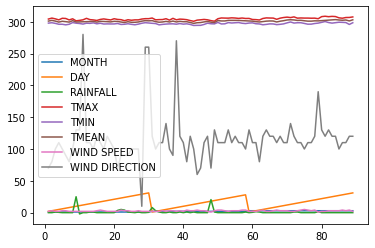

In [92]:
naia_df_clean.plot()

## Data Transformation
Data transformation is the partial or complete conversion of the dataset into a prescribed format or scale. We can use several techniques such as simple conversion, standardization, or normalization.

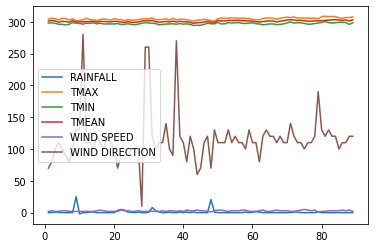

In [93]:
X = naia_df_clean.drop(labels=['MONTH','DAY'],axis=1)
X.plot()

### Normalization 
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

$$X' = \frac{X-X_{min}}{X_{max} - X_{min}}$$

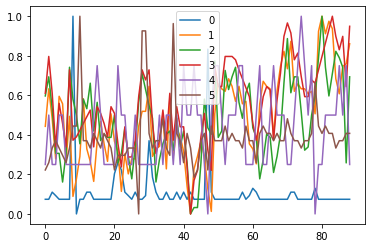

In [94]:
from sklearn.preprocessing import MinMaxScaler
## Set the scaler by fitting the dataset
norm_scaler = MinMaxScaler()
norm = norm_scaler.fit(X)
## Transform the target dataset
X_norm = norm.transform(X)
pd.DataFrame(X_norm).plot()

### Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

$$\frac{X-\mu}{\sigma}$$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


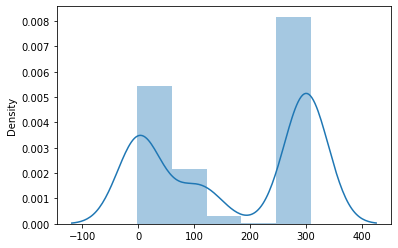

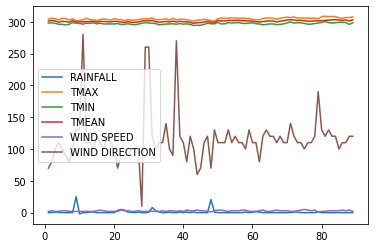

In [95]:
sns.distplot(X)
X.plot()

In [96]:
from sklearn.preprocessing import StandardScaler
## Set the scaler by fitting the dataset
std_scaler = StandardScaler()
standard = std_scaler.fit(X)
## Transform the target dataset
X_standard = standard.transform(X)

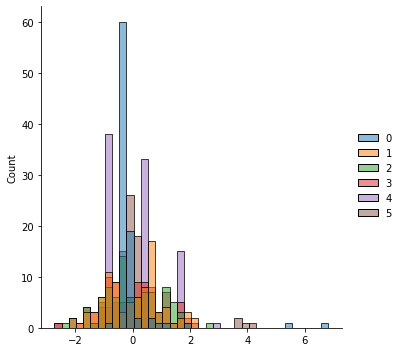

In [97]:
sns.displot(X_standard)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


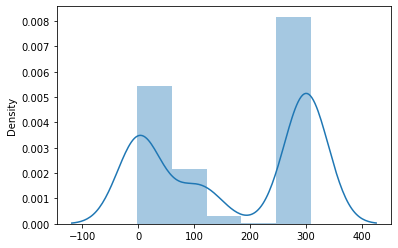

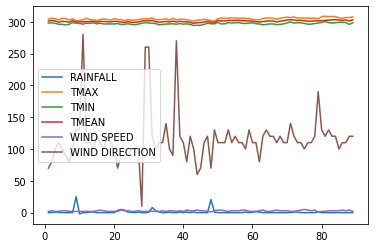

In [98]:
sns.distplot(X)
X.plot()